#### Because the dataset has been agumented inserting new words in the italian vocabolary and phrases into the dataset
#### We check if the stats related to the dataset have change combared to the first profiling (Profiling.ipynb)

In [31]:
## Data profiling
### 4. Profiling of the dataset
##### Informations computed
#####   4.1. avg len of phrases
#####   4.2 unique words vs not unique words
#####   4.3 Shared words in itlian and not italian vocabolaries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
dataset_agm=pd.read_csv('..\\..\\Dataset\\Dataset_agumented1.csv')
parsed_dataset=pd.read_csv('..\\..\\Dataset\\Lang_det_parsed.csv')

In [34]:
#### Analyzing word stats for italian and not italian observation
#AVG word length of italian texet
italian_avg_words4entry=parsed_dataset[parsed_dataset['Class']==1]['Number of words'].mean()
print("[BEFORE AGUM.]AVG words in italian sentence",italian_avg_words4entry)
italian_avg_words4entry=dataset_agm[dataset_agm['Class']==1]['Number of words'].mean()
print("[AFTER AGUM.]AVG words in italian sentence",italian_avg_words4entry)

[BEFORE AGUM.]AVG words in italian sentence 22.640401146131804
[AFTER AGUM.]AVG words in italian sentence 22.354776764282285


In [35]:
#general function to create a dict <word, count>
def fun_word2count(data):
    word2count=dict()
    
    for i in data:
        try:
            words=i.split(' ')
            for w in words:
                if w in word2count:
                    word2count[w]+=1
                else:
                    word2count[w]=1
        except:
            word2count[w]=1
    word2count=dict(sorted(word2count.items(), key=lambda x: x[1], reverse=True))
    return word2count


In [36]:
#plotting the word
def plot_word2count(word2count,sample):
    words=list(word2count.keys())
    occ=list(word2count.values())
    words_sample=words[0:sample]
    occ_sample=occ[0:sample]
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    
    fig = plt.figure(figsize = (20, 20))
    
    # creating the bar plot
    plt.barh(words_sample, occ_sample,)
    
    plt.xlabel("#occ")
    plt.ylabel("words")
    plt.title("Class to occ.")
    plt.yticks(rotation=40)
    plt.show()

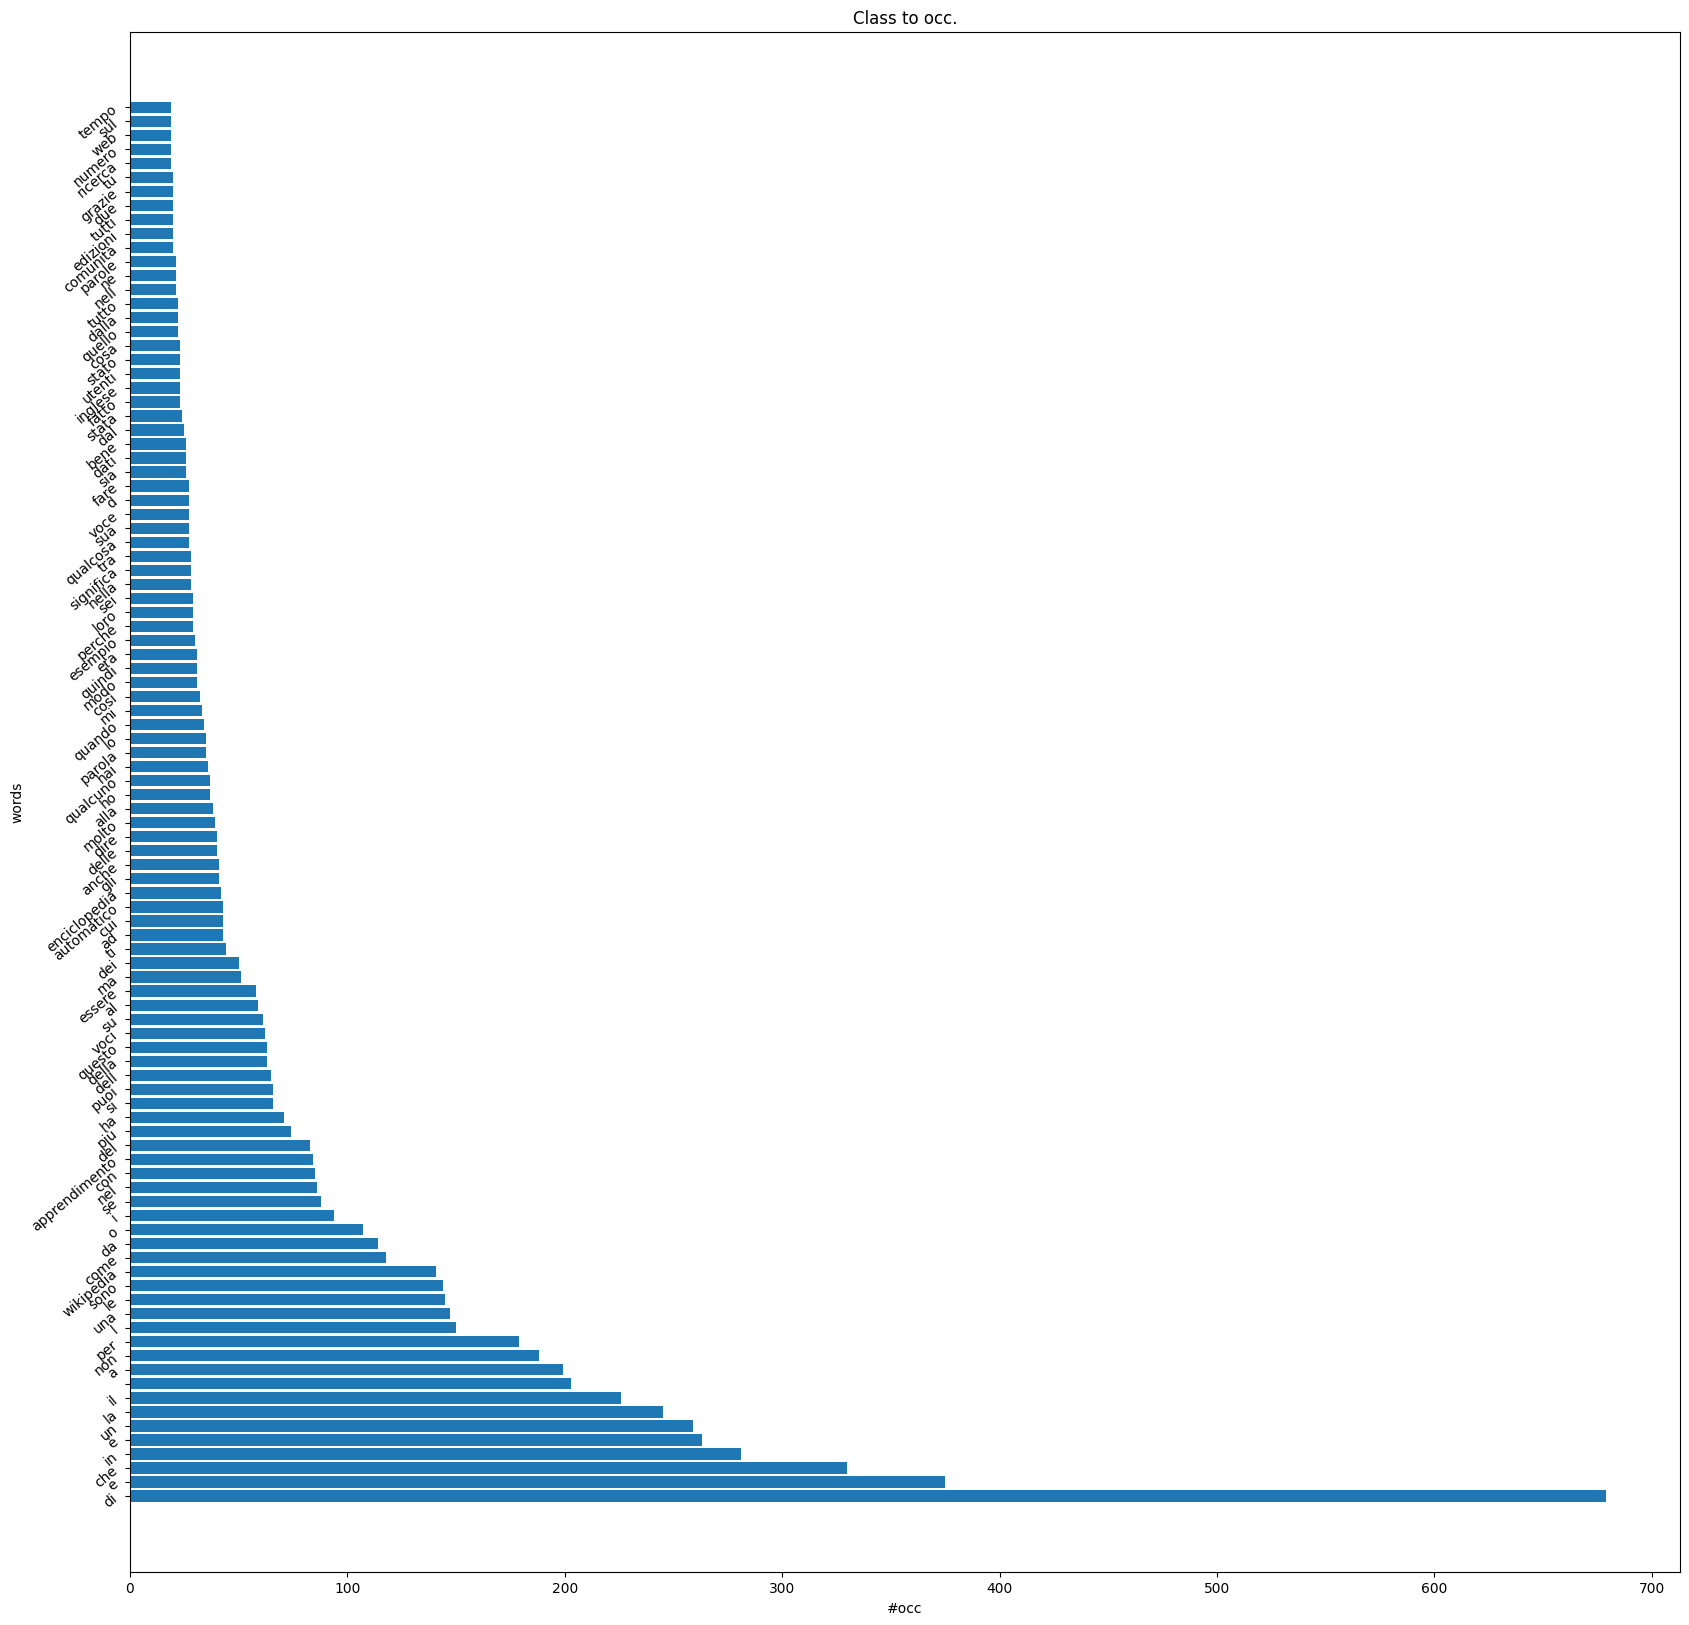

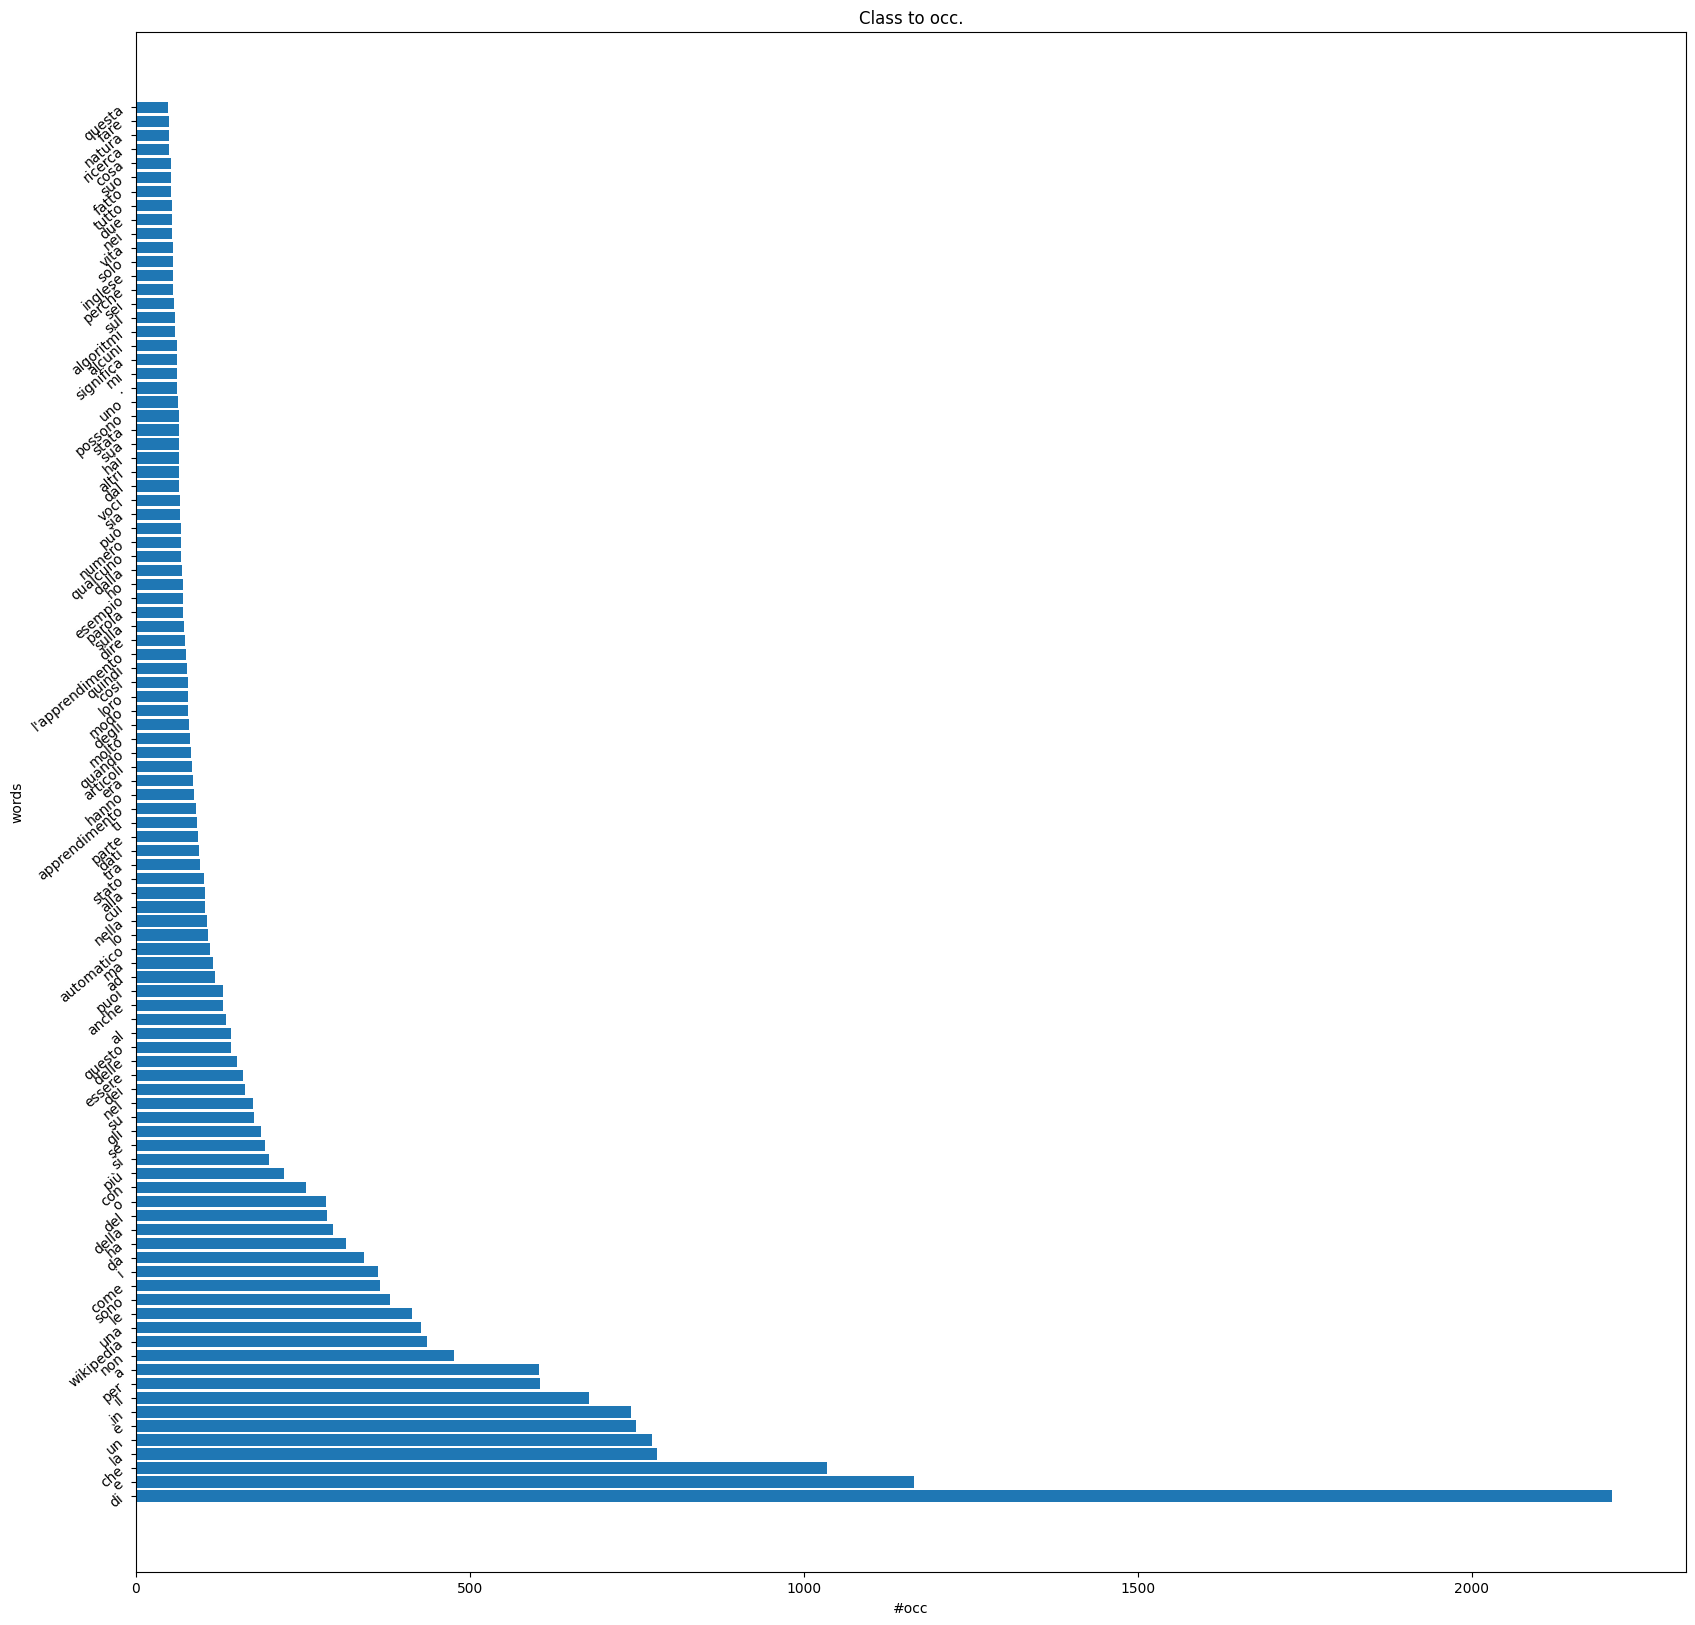

In [37]:
#Computing the dict <word, count> for both italian and not italina phrases
only_italian_bef_AGUM=parsed_dataset[parsed_dataset['Class']==1]['Text']
not_italian_bef_AGUM=parsed_dataset[parsed_dataset['Class']==0]['Text']
only_italian_after_AGUM=dataset_agm[dataset_agm['Class']==1]['Text']

word2count_ita_bef_AGUM=fun_word2count(only_italian_bef_AGUM)
word2count_other_bef_AGUM=fun_word2count(not_italian_bef_AGUM)
word2count_ita_after_AGUM=fun_word2count(only_italian_after_AGUM)

sample=100
plot_word2count(word2count_ita_bef_AGUM,sample)
plot_word2count(word2count_ita_after_AGUM,sample)


In [38]:
#top 20 italain words before agumentation
top_20_italian_words_before_AGUM=list(word2count_ita_bef_AGUM.keys())[:20]
print('BEFORE AGUM')
print(top_20_italian_words_before_AGUM)

#top 20 italian words after agumentation
top_20_italian_words_after_AGUM=list(word2count_ita_after_AGUM.keys())[:20]
print('AFTER AGUM')
print(top_20_italian_words_after_AGUM)



BEFORE AGUM
['di', 'e', 'che', 'in', 'è', 'un', 'la', 'il', '', 'a', 'non', 'per', 'l', 'una', 'le', 'sono', 'wikipedia', 'come', 'da', 'o']
AFTER AGUM
['di', 'e', 'che', 'la', 'un', 'è', 'in', 'il', 'per', 'a', 'non', 'wikipedia', 'una', 'le', 'sono', 'come', 'i', 'da', 'ha', 'della']


In [39]:
 #bottom 20 italian words before agumentation
bottom_20_italian_words_before_AGUM=list(word2count_ita_bef_AGUM.keys())[-20:]
print('BEFORE AGUM')
print(bottom_20_italian_words_before_AGUM)

#top 20 italian words after agumentation
bottom_20_italian_words_after_AGUM=list(word2count_ita_after_AGUM.keys())[-20:]
print('AFTER AGUM')
print(bottom_20_italian_words_after_AGUM)


#bottom 20 itlaian words after agumentation

BEFORE AGUM
['rivederti', 'avevi', 'inutile', 'importava', 'affatto', 'rendi', 'trattavi', 'comportato', 'carino', 'cambiato', 'lottato', 'pazientemente', 'vennero', 'incontrare', 'diteci', 'narcisismo', 'entrambi', 'cambiata', 'vorrebbe', 'assomigli']
AFTER AGUM
['entrati', 'marmellate', 'fatte.', 'sembrerà', 'il.', 'ruby', '\u200b\u200bsu', 'morso', "quell'aspetto", 'immangiabile,', 'voglio,', 'sposato', 'strizzarono', "l'occhio.", 'arrivata', 'rivista.', 'modi,', 'lottato,', 'venuti', 'Marian']


In [41]:
#Estimating words present in both italain and not italian vocabolary



#looking for the number of repeted words as rows*mean_words4prhase-total_unique_words)
#After Agumentation
italian_words_after_Agum=set(word2count_ita_after_AGUM.keys())    #set of itlaian words (italain vocabolary)
rows_After_AGUM=len(only_italian_after_AGUM)
total_unique_words_After_agum=len(word2count_ita_after_AGUM)
total_words_After_Agum=italian_avg_words4entry*rows_After_AGUM
words_not_unique_After_Agum=total_words_After_Agum-total_unique_words_After_agum

#BEFORE AGUMENTATION
italian_words_before_AGUM=set(word2count_ita_bef_AGUM.keys())    #set of itlaian words (italain vocabolary)

#looking for the number of repeted words as rows*mean_words4prhase-total_unique_words)
rows=len(only_italian_bef_AGUM)
total_unique_words=len(word2count_ita_bef_AGUM)
total_words=italian_avg_words4entry*rows
words_not_unique=total_words-total_unique_words
print('[BEFORE AGUM] Expected total words',total_words)
print('[AFTER AGUM] Expected total words',total_words_After_Agum)

print('[BEFORE AGUM] Total unique words:',total_unique_words)
print('[AFTER AGUM] Total unique words:',total_unique_words_After_agum)

print('[BEFORE AGUM] Potential not unique',words_not_unique)
print('[AFTER AGUM] Potential not unique',words_not_unique_After_Agum)






[BEFORE AGUM] Expected total words 15603.634181469035
[AFTER AGUM] Expected total words 46565.0
[BEFORE AGUM] Total unique words: 3757
[AFTER AGUM] Total unique words: 9082
[BEFORE AGUM] Potential not unique 11846.634181469035
[AFTER AGUM] Potential not unique 37483.0


In [42]:
#lets see now the common and not common words in the two vocabolaries after agumentation.
#This should give us more information about potential 'not italian' words in 'italian' text and viceversa
#First we get the stats of shared words, then we create a index to find out what words are shared in bot vocabolaries
#=========
#We compute the common words as follow: italian_words.intersection(other_words)
#we compute the not common words as follow: italian_words - other_words


other_words=set(word2count_other_bef_AGUM.keys())

common_words=italian_words_after_Agum.intersection(other_words)
not_common_words=italian_words_after_Agum.difference(other_words)
print('Italina words',len(italian_words_after_Agum))
print('Other words',len(other_words))
print('Common words',len(common_words))
print('NOT Common words',len(not_common_words))      

print('% common words:',len(common_words)/len(italian_words_after_Agum)*100)
print('% NOT common words:',len(not_common_words)/len(italian_words_after_Agum)*100)

'''
STATS BEFORE AGUM
Italina words 3757
Other words 44819
Common words 666
NOT Common words 3091
% common words: 17.726909768432257
% NOT common words: 82.27309023156774
'''


Italina words 9082
Other words 44819
Common words 1149
NOT Common words 7933
% common words: 12.651398370402994
% NOT common words: 87.348601629597


In [43]:
index=dict()


#setting the italain words value to 1
for i in italian_words_after_Agum: 
        index[i]=1

for i in other_words:
        if i in index:
                index[i]=2
        else:
                index[i]=0

print(index)   #this is why the base model did not detect the text 'big data è il futuro' as an Italian phrase
    

{'': 2, 'dispute': 2, 'bambina': 1, 'se': 2, "d'accordo.": 1, 'proporre': 1, 'seymour': 1, 'dannoso': 1, 'minuto': 2, 'notato': 1, 'offensive,': 1, "nell'elaborazione": 1, 'installato': 1, 'commentatori': 1, 'gassoso': 1, 'osceni': 1, 'documenti': 1, 'provvidenza': 1, 'analogamente': 1, 'scoprire': 1, 'diversità': 1, 'so': 2, 'maggioritarie.': 1, 'costituivano': 1, 'formare': 1, 'brandchannel.com': 1, 'maggior': 1, 'tecnologici': 1, 'darà': 1, 'mantengono': 1, 'parte.': 1, 'condivisione': 1, 'lago.': 1, 'non': 2, 'separato': 1, 'sera': 2, 'anglosassone': 1, 'arrivò': 1, 'raccogliessero': 1, 'gira': 1, 'dicembre\xa0[aggiornamento]': 1, 'dolly': 1, 'informazione': 1, 'chiarito': 1, 'no': 2, 'avrà': 1, 'erbacce.': 1, 'vecchia': 1, 'apprezzamento': 1, 'comprino': 1, 'situazioni': 1, 'blair.»': 1, 'trasmettere': 1, 'oro': 2, 'capo': 1, 'sapere"': 1, 'funzioni': 1, 'interessi.': 1, 'fair': 2, 'fermarti': 1, 'passo': 2, 'performance': 2, 'imparare': 1, 'watchlist': 2, 'neutrale': 1, "l'identi

In [45]:
#lets now create a file csv with all the words in the corpus 
#(both italian and not italian) providing the number counts in italain and not italian phrases
# and where they are present
#we do this by creating a dictionary key->value having: key=word, value=[encoding_of_prov, count]
path_word_2_prov_count='..\\..\\Dataset\\words_after_agum.csv'
word_2_prov_count={'Word':[],'where':[],'Count_ita':[],'Count_other':[],'Total_count':[]}
for word in index:
    word_2_prov_count['Word'].append(word)
    total_count_ita=0
    total_count_other=0
    if word in word2count_ita_after_AGUM:
        total_count_ita+=word2count_ita_after_AGUM[word]
    
        
    if word in word2count_other_bef_AGUM:
        total_count_other+=word2count_other_bef_AGUM[word]

    total_count=total_count_ita+total_count_other
    

    word_2_prov_count['Count_ita'].append(total_count_ita)
    word_2_prov_count['Count_other'].append(total_count_other)
    word_2_prov_count['Total_count'].append(total_count)
    word_2_prov_count['where'].append(index[word])

dataframe=pd.DataFrame.from_dict(word_2_prov_count).sort_values(by=['Total_count'],ascending=False)
dataframe.head(10)



,Word,where,Count_ita,Count_other,Total_count
33655,de,0,0,3493,3493
0,,2,135,2678,2813
6547,a,2,604,1685,2289
5287,di,1,2210,0,2210
8772,la,2,780,1216,1996
4517,in,2,741,946,1687
1097,the,2,8,1608,1616
1729,e,2,1165,410,1575
18617,en,0,0,1534,1534
5787,un,2,772,596,1368


In [ ]:
#saving the dataframe 
dataframe.to_csv(path_word_2_prov_count)